<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons Licence" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>

# Lab 1: Customer Clustering & Visualization

## Objective & Description:
This Lab focuses on clustering and visualizing bank customers' data, which includes variables such as date of birth (DOB), account balance, transactions, transaction amount, and transaction place. We will use publicly available data from a bank in India to learn how to preprocess data and to prepare it for clustering and visualization.

The objective of the lab is to equip participants with the skills to analyze and gain insights from customer data, which they can use to improve business strategies and decision-making processes. Participants will learn how to use Python programming language libraries such as Pandas, NumPy, and Scikit-learn to preprocess the data, perform clustering using algorithms such as K-Means, Hierarchical Clustering, and DBSCAN, and visualize the results using techniques such as scatter plots, 3D plots, and heatmaps.

If you don't know Python don't worry we've got you backed up here are some resources to learn python:
- [Introduction to Python - DataCamp](https://www.datacamp.com/courses/intro-to-python-for-data-science)
- [Python for Data Science: Fundamentals  - DataQuest](https://www.dataquest.io/course/python-for-data-science-fundamentals/)
- [Python for Data Science: Intermediate  - DataQuest](https://www.dataquest.io/course/python-for-data-science-intermediate/)
- [Maybe you prefer books](https://pythonbooks.org/free-books/)

## Tasks:
The workshop consists of multiple tasks which have to be solved sequentially:

1. **Data cleaning.** Clean the bank customer data by handling missing values, identifying and handling outliers, and transforming the data as needed. 

2. **Data exploration.** Use appropriate visualization techniques to identify patterns in the data. Create visualizations that clearly and accurately represent the relationships between different features of the data. This is critical to assess your trained model in the next step.)

3. **Train your clustering model.** Apply clustering techniques to the preprocessed data and compare the results of at least two different clustering algorithms. Calculate accuracy of your model predictions and the overall quality of clustering models. 

4. **Visualize clustering results.** Create visualizations that accurately represent the clustering results. Use appropriate visualization techniques to highlight the differences between different clusters and provide insights into the patterns present in the data.

5. **Data interpretation and conclusions.** Interpret and analyze the results of their clustering models and visualizations. Draw meaningful insights from analysis and present findings in a clear and concise manner.

Follow the steps on this Jupyter notebook.


### Data Cleaning

#### Task 1.1
We have preloaded the dataset into this environment. You are expected to do the following:

1. Load the dataset to the notebook as a pandas DataFrame.
<details>
    <summary>hint:</summary>
Pandas has the method `read_csv`.
Look for the csv file in the side panel copy its path and load it using the previous method.
</details>

2. Inspect the data.
<details>
    <summary>hint:</summary>
Pandas Dataframe has the method `head`
</details>
3. You are provided with the function `data_status`. Call it on the DataFrame. What do you inspect ?
<details>
    <summary>hint:</summary>
Maybe wrong types?
</details>
4. Look at the info of your data. What do you realize about the numbers ? 
<details>
    <summary>hint:</summary>
Pandas DataFrame has the method `info`. invoke it on your data. hint: Any null values? 
</details>

In [ ]:
!git clone https://github.com/khengari77/Lab-1-Customer-Clustering-Visualization.git
!pip install umap-learn

Cloning into 'Lab-1-Customer-Clustering-Visualization'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 7 (delta 0), reused 5 (delta 0), pack-reused 0
Unpacking objects: 100% (7/7), 23.95 MiB | 7.69 MiB/s, done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 30.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=242e509ffcf44388f18a7bb32dda8155c95d699d269b3b9fa7242133256b35e0
  Stored in directory: /root/.cache/pip/wheels/a9/3a/67/06a8950e053725912e6a8c42c4a3a241410f6487b8402542ea
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=5551

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# load your data by passing the csv file path to the read_csv function.
transactions = pd.read_csv('./Lab-1-Customer-Clustering-Visualization/bank_transactions.csv')

In [ ]:
print(transactions)
def data_status(df):
    columns = df.columns
    stat = []
    for column in columns:
        data_type = type(df[column][0])
        num_dups = np.sum(df[column].duplicated())
        num_null = np.sum(df[column].isna())
        stat.append([column, data_type, num_dups, num_null])
    status_frame = pd.DataFrame(stat)
    status_frame.columns = ['column', 'data type', 'no. duplicates', 'no. null']
    return status_frame

        TransactionID CustomerID CustomerDOB CustGender   CustLocation  \
0                  T1   C5841053     10/1/94          F     JAMSHEDPUR   
1                  T2   C2142763      4/4/57          M        JHAJJAR   
2                  T3   C4417068    26/11/96          F         MUMBAI   
3                  T4   C5342380     14/9/73          F         MUMBAI   
4                  T5   C9031234     24/3/88          F    NAVI MUMBAI   
...               ...        ...         ...        ...            ...   
1048562      T1048563   C8020229      8/4/90          M      NEW DELHI   
1048563      T1048564   C6459278     20/2/92          M         NASHIK   
1048564      T1048565   C6412354     18/5/89          M      HYDERABAD   
1048565      T1048566   C6420483     30/8/78          M  VISAKHAPATNAM   
1048566      T1048567   C8337524      5/3/84          M           PUNE   

         CustAccountBalance TransactionDate  TransactionTime  \
0                  17819.05          2/8/16    

In [ ]:
# Solve Task 1.1.1 here
transactions.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


In [ ]:
# Solve Task 1.1.2 here
data_status(transactions)

,column,data type,no. duplicates,no. null
0,TransactionID,<class 'str'>,0,0
1,CustomerID,<class 'str'>,164302,0
2,CustomerDOB,<class 'str'>,1031312,3397
3,CustGender,<class 'str'>,1048563,1100
4,CustLocation,<class 'str'>,1039211,151
5,CustAccountBalance,<class 'numpy.float64'>,887238,2369
6,TransactionDate,<class 'str'>,1048512,0
7,TransactionTime,<class 'numpy.int64'>,966649,0
8,TransactionAmount (INR),<class 'numpy.float64'>,955543,0


In [ ]:
# Solve Task 1.1.3 here
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


#### Task 1.2
What did you notice? Probably some missing values, wrong types and feature we don't need?
Drop any null values and columns that we don't need.
<details>
    <summary>hint:</summary>
    For drop null values we have the method `dropna`. For dropping a certain column or row we have the drop method. Remember you can always look in the pandas documentation.

In [ ]:
# Solve Task 1.2 here
cleaned_df = transactions.copy() \
                              .dropna() \
                              .drop(columns='TransactionID')
del transactions

#### Task 1.3
It is always said that data cleaning makes up 80% of a data scientist work. We have quite some cleaning to do if we want to get the most out of our data.

Convert columns with wrong types to a more suitable form. The DOB column was processed for you. You only have to work through the other columns. Feel free to add any other columns that you induce from the data or drop any column that you are finished with (extracted the useful data). 

**Remember it's always a good practice to make a copy from your DataFrame after each major manipulation** use the method `copy`. 

**Also, remember to inspect your data after each step using the methods in (Task 1.1).** They are quite handy. They also show you if your process succeeded or not.
<details>
    <summary>hint:</summary>
    1. Columns in Pandas DataFrames are basically Pandas Series. A great feature of Pandas Series is that you can apply functions to them in an element-wise fashion. Suppose we have a data series that has a scale form 0 - 2 and we want to scale it from 0 - 1 you can do something like: `series/2` 
     <br> <br>
    2. Pandas has a function : to_datetime that converts any date or time representation in another form to DateTime object
     <br> <br>
    3. Rare categories should be dealt with either by putting them in a one "UNKNOWN" category or by using any statistical method to eliminate them.
</details>

In [ ]:
# feel free to change the variable names.
cleaned_df = cleaned_df[cleaned_df['CustomerDOB']\
              .str \
              .fullmatch("\d{1,2}[\/]\d{1,2}[\/]\d{2}")]
# We used regex pattern matching here because there was some dates 
# that had an incorrect string representation. 
# filtered the dataframe and removed any samples such.
# Filtering in pandas is quite intuitive it has the following general syntax
# df = df[predicate_func(df)]

In [ ]:
# We could have used pd.to_datetime 
# but we have dates that are before 1/1/1969
# which aren't supported by unix so we use string methods
# See Pandas docs 
# https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html
dates = cleaned_df['CustomerDOB'].copy().str.split("/")

In [ ]:
# This data was collected in 2016 so we can assume 
# that any date birth between 00 - 09 is in the 21st century. 
# This might not be true for all cases but it won't be harmful 
# because the percentage of such cases is negligible.

def full_year(i):
    if i > 9:  return 1900 + i
    else: return 2000 + i

year_of_birth = dates.apply(lambda x: full_year(int(x[2])))
del dates

In [ ]:
# Solve task 1.3 here & below
# you can add a new cell by pressing ESC then b on your keyboard
transaction_date = pd.to_datetime(cleaned_df['TransactionDate'], format="%d/%m/%y")

In [ ]:
transaction_time = pd.to_datetime(cleaned_df['TransactionTime'] \
                                  .astype(str) \
                                  .str.zfill(6) \
                                  ,format="%H%M%S")

In [ ]:
customer_age = transaction_date.dt.year - year_of_birth

In [ ]:
day_in_month = transaction_date.dt.day

In [ ]:
day_of_week = transaction_date.dt.day_of_week

In [ ]:
seconds = (transaction_time - transaction_time.dt.floor('d')).dt.total_seconds()

In [ ]:
cleaned_df['customer_age'] = customer_age
cleaned_df['day_in_month'] = day_in_month
cleaned_df['day_of_week'] = day_of_week
cleaned_df['seconds'] = seconds

In [ ]:
locations = cleaned_df['CustLocation']

In [ ]:
known = locations.value_counts()[locations.value_counts(normalize=True).cumsum() < 0.9]

In [ ]:
locations = locations.apply(lambda x: x if x in known else "UNKNOWN")
del known

In [ ]:
cleaned_df['CustLocation'] =  locations

In [ ]:
cleaned_df = cleaned_df.drop(columns=['TransactionDate', 'TransactionTime', 'CustomerDOB'])

In [ ]:
# Solve Task 1.1.1 here
cleaned_df.head()

,CustomerID,CustGender,CustLocation,CustAccountBalance,TransactionAmount (INR),customer_age,day_in_month,day_of_week,seconds
0,C5841053,F,JAMSHEDPUR,17819.05,25.0,22,2,1,52327.0
1,C2142763,M,JHAJJAR,2270.69,27999.0,59,2,1,51538.0
2,C4417068,F,MUMBAI,17874.44,459.0,20,2,1,52032.0
3,C5342380,F,MUMBAI,866503.21,2060.0,43,2,1,52034.0
4,C9031234,F,NAVI MUMBAI,6714.43,1762.5,28,2,1,65516.0


In [ ]:
# Solve Task 1.1.2 here
data_status(cleaned_df)

,column,data type,no. duplicates,no. null
0,CustomerID,<class 'str'>,146241,0
1,CustGender,<class 'str'>,985320,0
2,CustLocation,<class 'str'>,984923,0
3,CustAccountBalance,<class 'numpy.float64'>,832489,0
4,TransactionAmount (INR),<class 'numpy.float64'>,898539,0
5,customer_age,<class 'numpy.int64'>,985223,0
6,day_in_month,<class 'numpy.int64'>,985291,0
7,day_of_week,<class 'numpy.int64'>,985315,0
8,seconds,<class 'numpy.float64'>,903928,0


In [ ]:
# Solve Task 1.1.3 here
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 985322 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   CustomerID               985322 non-null  object 
 1   CustGender               985322 non-null  object 
 2   CustLocation             985322 non-null  object 
 3   CustAccountBalance       985322 non-null  float64
 4   TransactionAmount (INR)  985322 non-null  float64
 5   customer_age             985322 non-null  int64  
 6   day_in_month             985322 non-null  int64  
 7   day_of_week              985322 non-null  int64  
 8   seconds                  985322 non-null  float64
dtypes: float64(3), int64(3), object(3)
memory usage: 107.4+ MB


#### Data exploration:
Really, there is no limit to how you can explore data other than your imagination. You can get some metrics of your data by invoking the `describe`. A better way to explore data is by visualizations. [Matplotlib](https://matplotlib.org/stable/index.html) & [Seaborn](https://seaborn.pydata.org/) are two famous library when it comes to data visualizations. Here are some ideas:
- correlation matrix.
- age distribution.
- gender distribution.
- income distribution.
- transactions amount vs income.
- number of transactions vs income.
- income vs age.
- income vs gender
- time vs transactions amount
- date vs transactions amount
- time vs number of transactions
- date vs number of transactions

Feel free to do other investigations. Don't limit your imagination!

In [ ]:
# Now we have a clean dataset that we can work with. 
# Let's start by importing some visualization libraries.
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
# You might need to plot a sample only
font = {'weight' : 'bold',
        'size'   : 18}

matplotlib.rc('font', **font)

In [ ]:
df_vis = cleaned_df.copy()

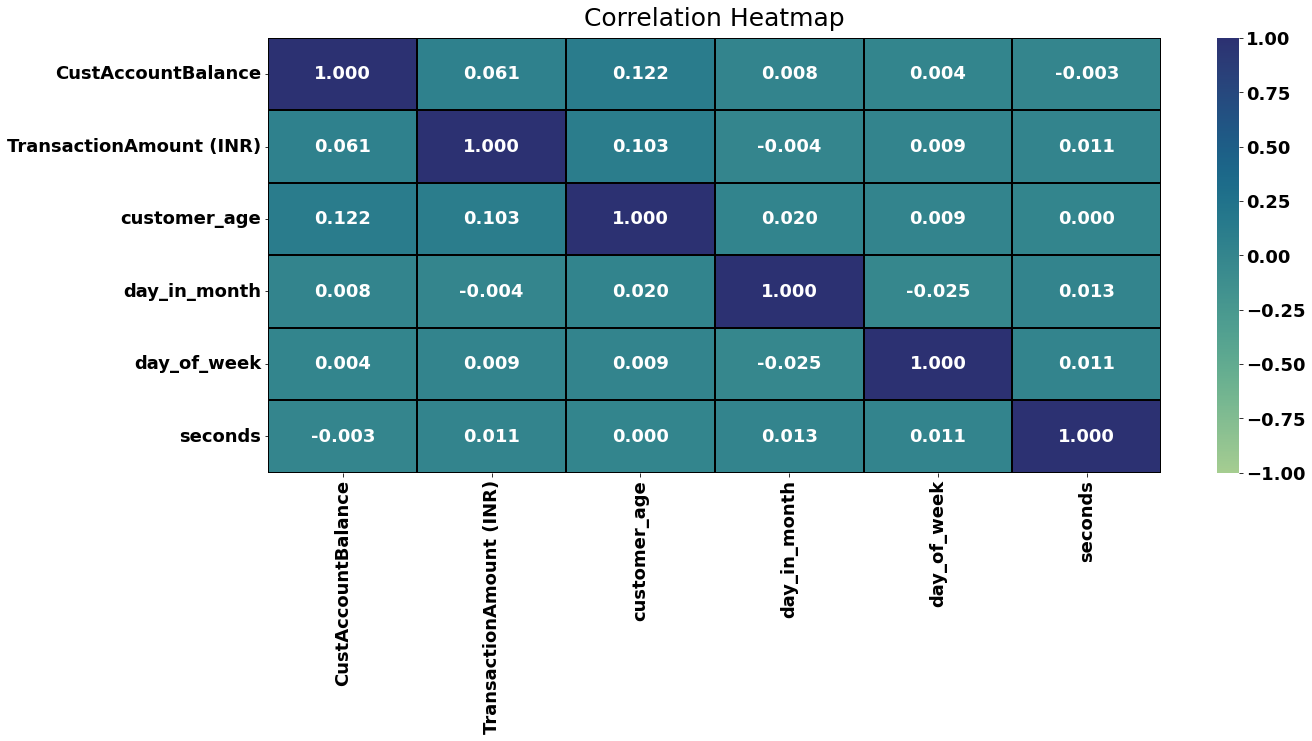

In [ ]:
# DataFrame Correlation
# Increase the size of the heatmap.
plt.figure(figsize=(20, 8))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df_vis.corr(), vmin=-1, vmax=1, annot=True, cmap='crest', fmt='.3f', linewidths=0.01, linecolor='black')
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', pad=12, size=25);

Text(0.5, 1.0, 'Age Distribution')

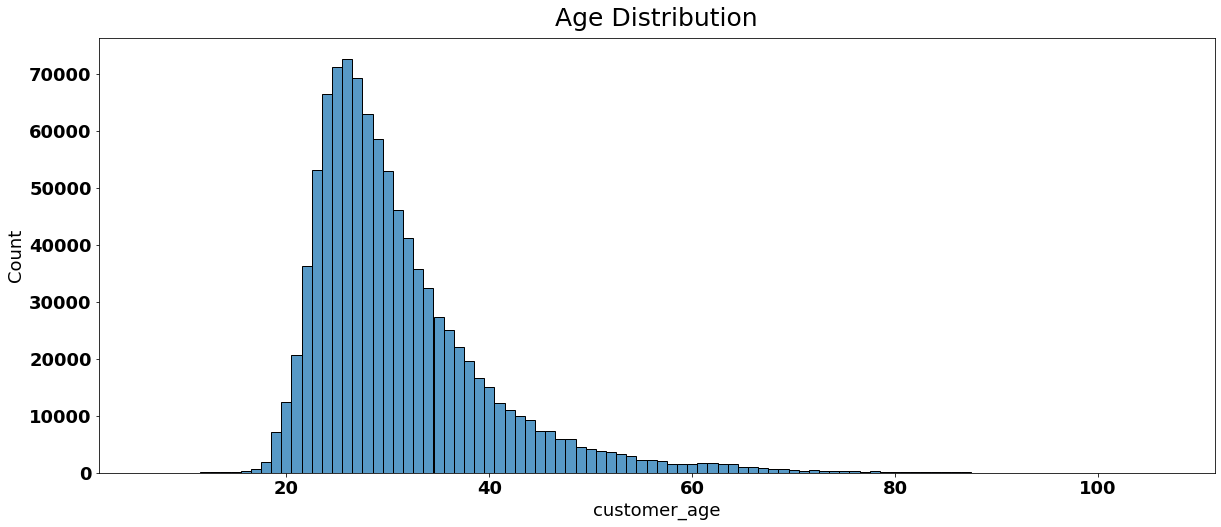

In [ ]:
# Age Distribution

plt.figure(figsize=(20, 8))
age_hist = sns.histplot(df_vis['customer_age'], discrete=True)
age_hist.set_title('Age Distribution', pad=12, size=25)

Text(0.5, 1.0, 'Age Box (Outliers)')

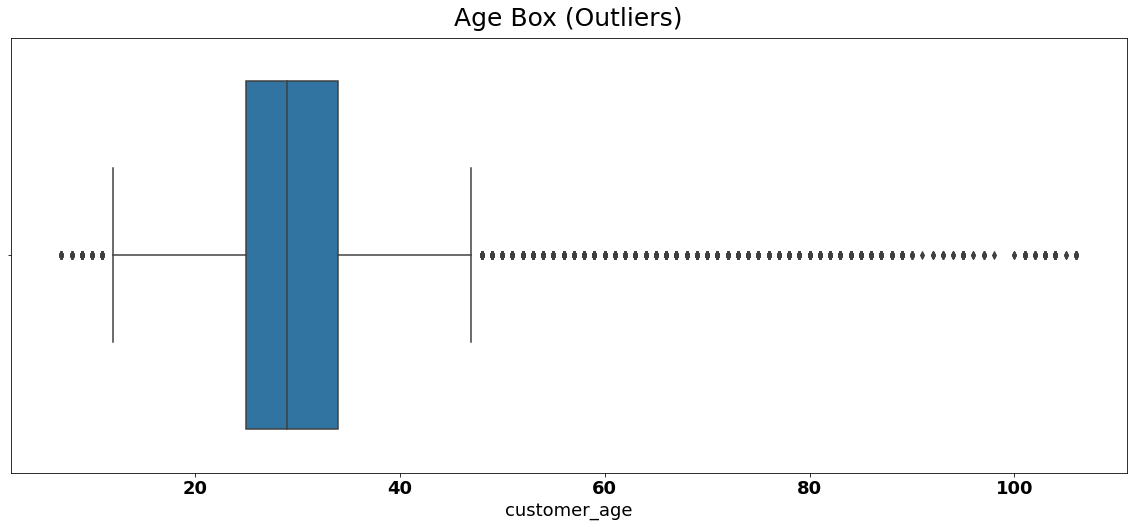

In [ ]:
# Age Distribution

plt.figure(figsize=(20, 8))
age_hist = sns.boxplot(x=df_vis['customer_age'])
age_hist.set_title('Age Box (Outliers)', pad=12, size=25)

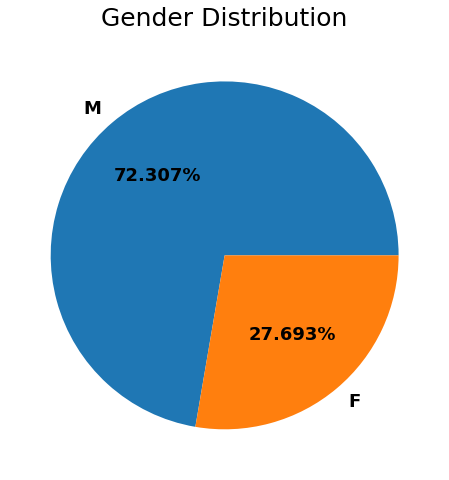

In [ ]:
# Gender Distribution
gender_values = df_vis['CustGender'].value_counts()
plt.figure(figsize=(20, 8))
plt.pie(gender_values, labels=gender_values.index, autopct='%1.3f%%', )
plt.title("Gender Distribution", pad=12, size=25)
plt.show()
del gender_values

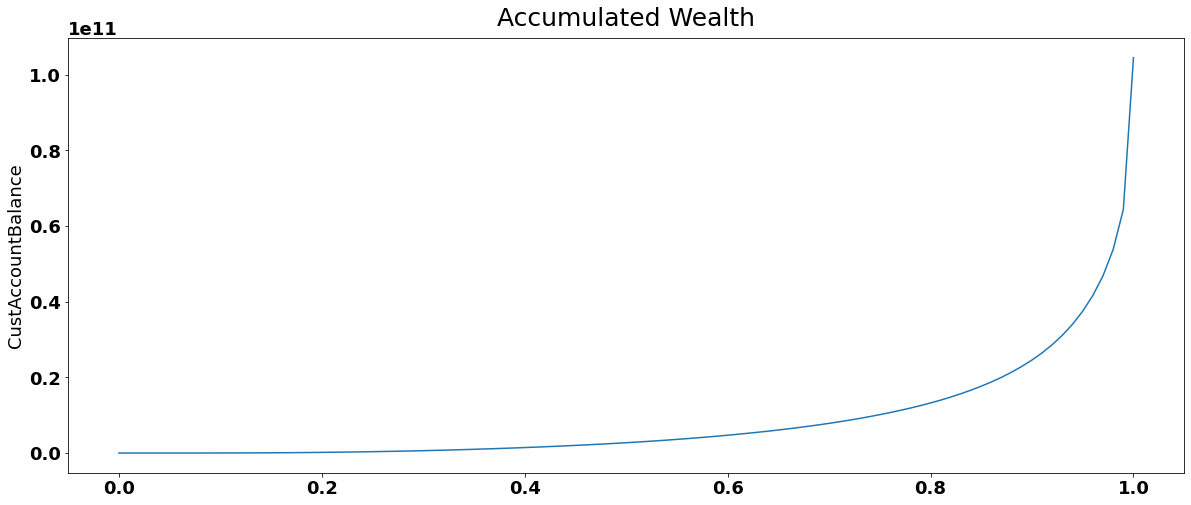

In [ ]:
# Accummulated wealth over the population
income = df_vis['CustAccountBalance'].sort_values()
plt.figure(figsize=(20, 8))
acc_wealth = sns.lineplot(data=income.cumsum().quantile([0.01*i for i in range(101)]))
acc_wealth.set_title('Accumulated Wealth', pad=12, size=25);
del income

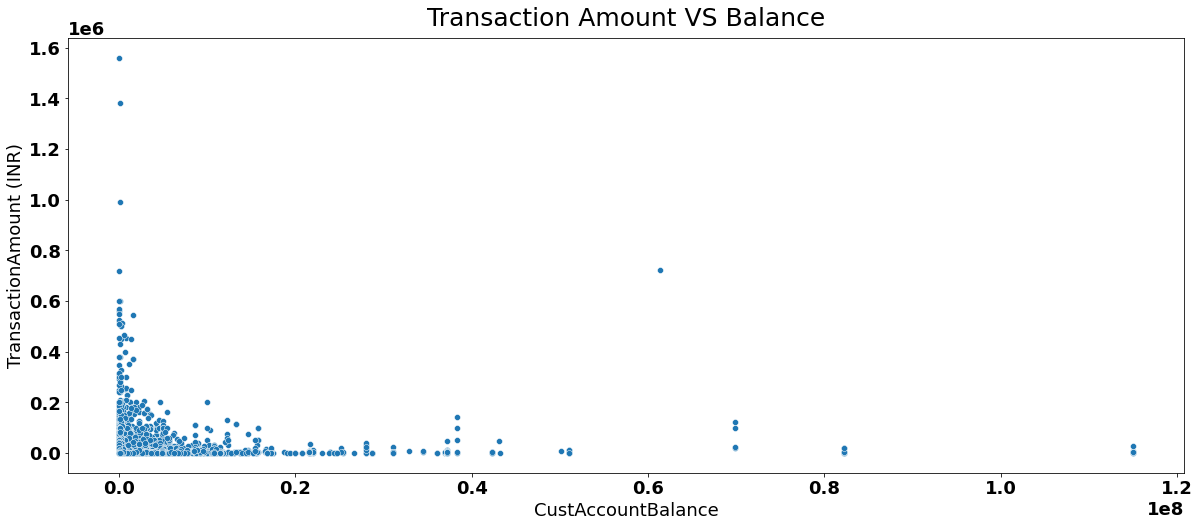

In [ ]:
plt.figure(figsize=(20, 8))
balance_transaction = sns.scatterplot(x = df_vis['CustAccountBalance'],\
                                   y = df_vis['TransactionAmount (INR)'])
balance_transaction.set_title('Transaction Amount VS Balance', pad=12, size=25);


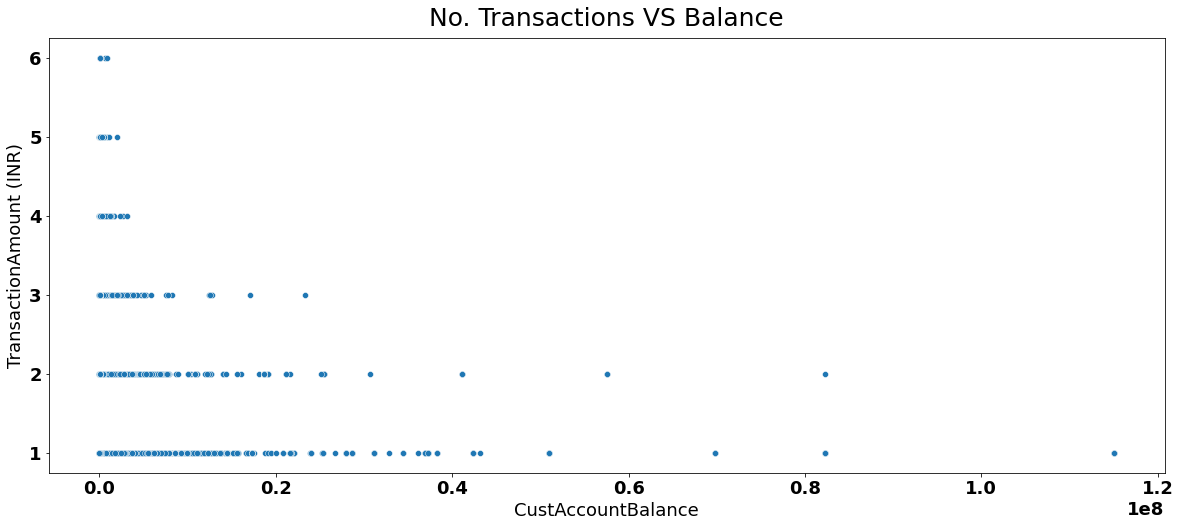

In [ ]:
transactions_per_user = df_vis.groupby(by='CustomerID')['TransactionAmount (INR)'].count()
mean_balance = df_vis.groupby(by='CustomerID')['CustAccountBalance'].mean()
plt.figure(figsize=(20, 8))
balance_ntransaction = sns.scatterplot(x=mean_balance, y=transactions_per_user)
balance_ntransaction.set_title('No. Transactions VS Balance', pad=12, size=25);
del transactions_per_user
del mean_balance

In [ ]:
df_vis.groupby(by='CustomerID')['TransactionAmount (INR)'] \
             .count() \
             .value_counts()

1    710185
2    113138
3     14291
4      1353
5       108
6         6
Name: TransactionAmount (INR), dtype: int64

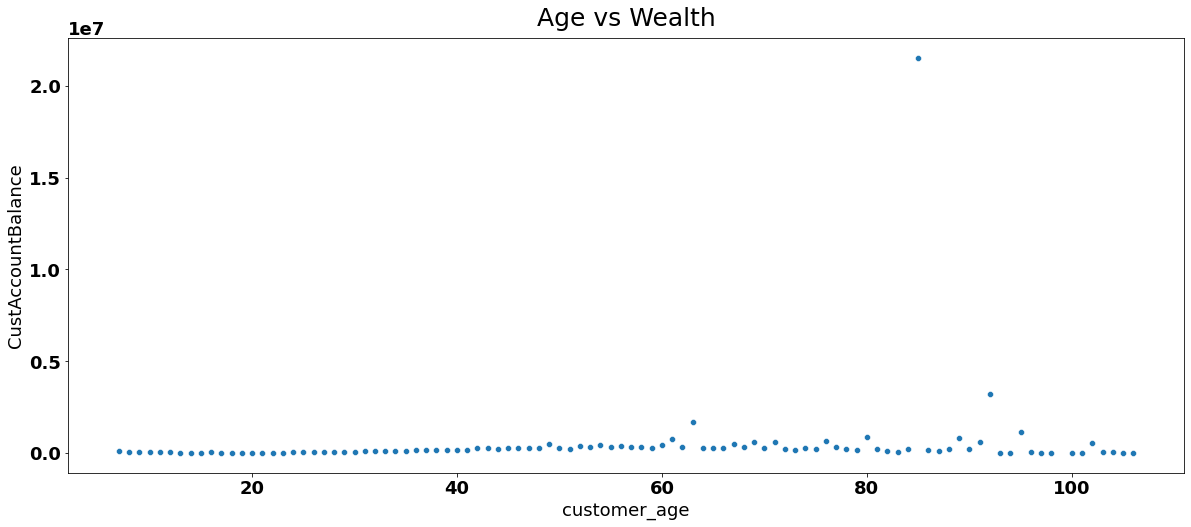

In [ ]:
mean_wealth_by_age = df_vis.groupby(by = 'customer_age')['CustAccountBalance'].mean()
plt.figure(figsize=(20, 8))
age_wealth_hist = sns.scatterplot(data = mean_wealth_by_age)
age_wealth_hist.set_title('Age vs Wealth', pad=12, size=25)
del mean_wealth_by_age

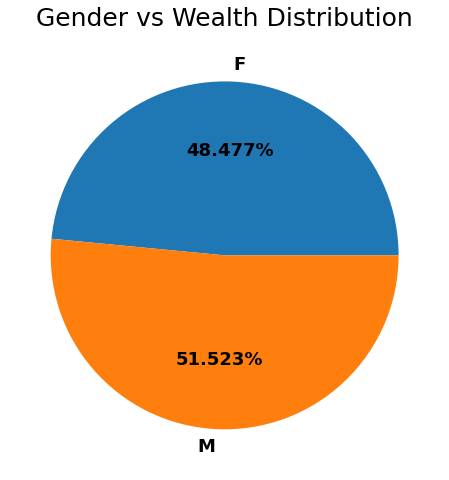

In [ ]:
mean_wealth_by_gender = df_vis.groupby(by = 'CustGender')['CustAccountBalance'].mean()
plt.figure(figsize=(20, 8))
plt.pie(mean_wealth_by_gender, labels=mean_wealth_by_gender.index, autopct='%1.3f%%', )
plt.title("Gender vs Wealth Distribution", pad=12, size=25)
plt.show()
del mean_wealth_by_gender

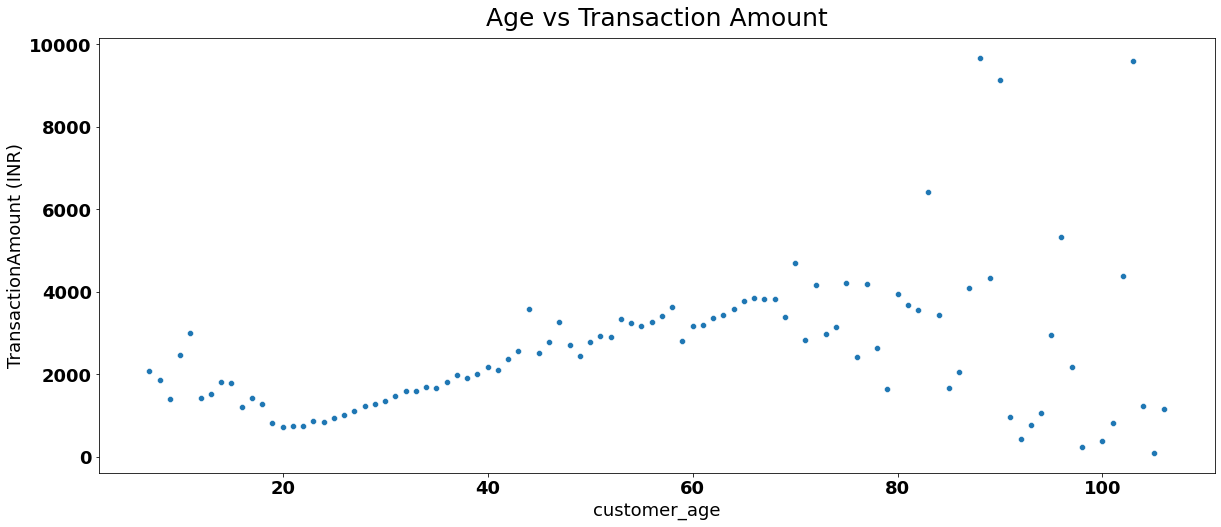

In [ ]:
mean_transaction_by_age = df_vis.groupby(by = 'customer_age')['TransactionAmount (INR)'].mean()
plt.figure(figsize=(20, 8))
age_transaction_hist = sns.scatterplot(data = mean_transaction_by_age)
age_transaction_hist.set_title('Age vs Transaction Amount', pad=12, size=25)
del mean_transaction_by_age

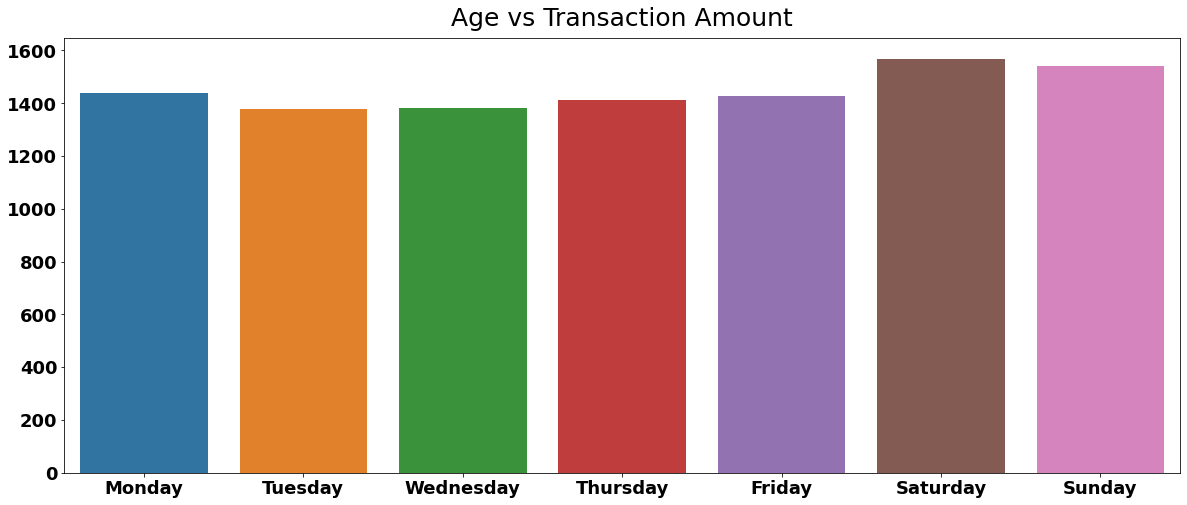

In [ ]:
transaction_by_day = df_vis.groupby(by='day_of_week')['TransactionAmount (INR)'].mean()
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(20, 8))
age_transaction_hist = sns.barplot(x = weekdays, y= transaction_by_day.values)
age_transaction_hist.set_title('Day vs Transaction Amount', pad=12, size=25)
del transaction_by_day

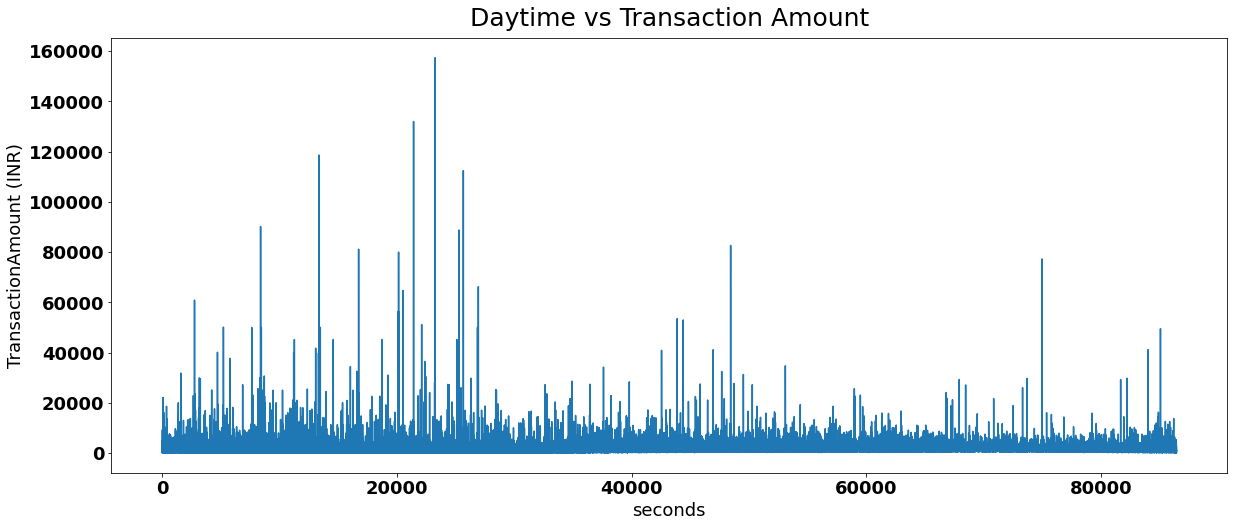

In [ ]:
mean_transaction_by_daytime = df_vis.groupby(by = 'seconds')['TransactionAmount (INR)'].mean()
plt.figure(figsize=(20, 8))
age_transaction_hist = sns.lineplot(data = mean_transaction_by_daytime)
age_transaction_hist.set_title('Daytime vs Transaction Amount', pad=12, size=25)
del mean_transaction_by_daytime

In [ ]:
del df_vis

### Data Preprocessing
Most artificial intelligence models take numbers as their inputs, but we have categorical data in our data. We also have time data. To solve this problem we have to convert these categories to numbers. A way to do that is by [one-hot encoding](https://en.wikipedia.org/wiki/One-hot). This method basically makes each category a column itself and assigns 1 to the sample its present in and 0 if it isn't. In a case where we have binary categorical data (like our gender data) we can basically omit one of the categories.

The best order of operations for speeding runtime is 
 1. Copying the location column.
 2. Applying One-Hot encoding to the gender and locations.
    Note that you don't need to use the One-Hot object for gender you can apply the operation in place try using the `apply` method
 3. Dropping the string columns.
 4. Normalizing the columns.
 5. Concatenating the location data in its one-hot format.
 6. Reducing the dimension of the data.
I don't say that this order is the correct but it worked best for me.

In [ ]:
from sklearn.preprocessing import OneHotEncoder, minmax_scale
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

#### Task 3.1

Convert the location data and the gender data to one-hot encoding format

In [ ]:
# Copying the data and taking a look at its state.
preprocessed = cleaned_df.copy()
preprocessed.head()

,CustomerID,CustGender,CustLocation,CustAccountBalance,TransactionAmount (INR),customer_age,day_in_month,day_of_week,seconds
0,C5841053,F,JAMSHEDPUR,17819.05,25.0,22,2,1,52327.0
1,C2142763,M,JHAJJAR,2270.69,27999.0,59,2,1,51538.0
2,C4417068,F,MUMBAI,17874.44,459.0,20,2,1,52032.0
3,C5342380,F,MUMBAI,866503.21,2060.0,43,2,1,52034.0
4,C9031234,F,NAVI MUMBAI,6714.43,1762.5,28,2,1,65516.0


In [ ]:
preprocessed['CustGender'] = preprocessed['CustGender'].apply(lambda x: 1 if x=='M' else 0)

In [ ]:
location_encoder = OneHotEncoder()

In [ ]:
locations_matrix = location_encoder.fit_transform(preprocessed['CustLocation'].to_numpy().reshape(-1,1))

In [ ]:
locations = pd.DataFrame.sparse.from_spmatrix( locations_matrix, columns=location_encoder.categories_)

In [ ]:
preprocessed = preprocessed.drop(columns=['CustLocation', 'CustomerID'])

#### Task 3.2

Convert the time and date data into a numerical representation
<details>
    <summary>hint:</summary>
Consider values that repeat and effect the data. Data that doesn't change or has a minimal change can be ignored. For example all our data is from 2016 so we can ignore the year.
</details>


In [ ]:
# I have done this earlier

#### Task 3.3
It is usually better to normalize our data in a controlled range for example (0,1). Scikit-learn toolkit has various tools for normalizing data. One of the famous methods is min-max scaling. Apply it on your data per feature. 

In [ ]:
preprocessed = preprocessed.apply(minmax_scale, axis=0)

In [ ]:
preprocessed = pd.concat([preprocessed, locations], join='inner', axis=1)

#### Task 3.4
Inspect your data now. WOW! those are a lot of features. Data with high dimensionality is hard to train and results in poor results. Fortunately there are techniques to reduce the dimensionality of data such as [PCA](https://en.wikipedia.org/wiki/Principal_component_analysis) and [autoencoders](https://en.wikipedia.org/wiki/Autoencoder). Now using PCA reduce the number of features in your data to a sensible number. 

Note: *Reducing the dimensions of your data isn't a lossless operation. You will lose a lot of data. It's a matter of losing unneeded data. The truth is that the number of features is a hyperparameter and likely you will have to experiment with different numbers until you find a suitable one.*

In [ ]:
data_reducer = PCA(n_components=64)

In [ ]:
data = preprocessed.to_numpy()

In [ ]:
del preprocessed
del cleaned_df
del locations
del locations_matrix

In [ ]:
reduced_data = data_reducer.fit_transform(data)

In [ ]:
reduced_data.shape

(925922, 64)

### Training your model
At last you have reached to the main! That was a long journey wasn't it?! There are many clustering algorithms that are in use in the ML industry: Kmeans, DBSCAN, and Hierarchical Clustering are a few to name. You are required to implement K-means on the data. Choosing the right number of clusters can be tricky but fortunately there are heuristics that help us determine a good number of clusters. Two of the most popular methods are: 
1. The elbow method
2. The Silhouette Method
If you want to learn more read [here](https://towardsdatascience.com/how-many-clusters-6b3f220f0ef5)

You are provided with a function that calculates the silhouette score for a range of Ks starting from 2 until the number you specify. 

I will leave the actual interpretation of the silhouette score as an exercise for the reader to search for.

In [ ]:
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
from sklearn.utils import resample 
import matplotlib.cm as cm

In [ ]:
def silhouette_plot(data, max_clusters=16, n_samples=256, rounds=50):
    silhouette_scores = []
    for k in range(2,max_clusters):
        clusterer = KMeans(n_clusters=k, n_init='auto')
        cluster_labels = clusterer.fit_predict(data)
        mean_score = 0
        for i in range(rounds):
             mean_score += silhouette_score(data, cluster_labels, sample_size=n_samples)
        mean_score /= rounds
        silhouette_scores.append(mean_score)
        print(f"For n_clusters = {k} The average silhouette_score is:\
              {silhouette_scores[k - 2]}")
    plt.figure(figsize=(20, 8))
    plt.plot(range(2, max_clusters), silhouette_scores)
    plt.title("Silhouette Score per K")
    plt.xlabel("K")
    plt.ylabel("Silhouette Score")
    plt.show()

For n_clusters = 2 The average silhouette_score is:              0.19071540283115984
For n_clusters = 3 The average silhouette_score is:              0.10871329656887309
For n_clusters = 4 The average silhouette_score is:              0.14360766766086872
For n_clusters = 5 The average silhouette_score is:              0.14463736573772074
For n_clusters = 6 The average silhouette_score is:              0.2338307758311235
For n_clusters = 7 The average silhouette_score is:              0.15514785061831673
For n_clusters = 8 The average silhouette_score is:              0.23554994075073268
For n_clusters = 9 The average silhouette_score is:              0.2250929497195729
For n_clusters = 10 The average silhouette_score is:              0.23250405394082727
For n_clusters = 11 The average silhouette_score is:              0.23013519916945782
For n_clusters = 12 The average silhouette_score is:              0.2428017757716348
For n_clusters = 13 The average silhouette_score is:             

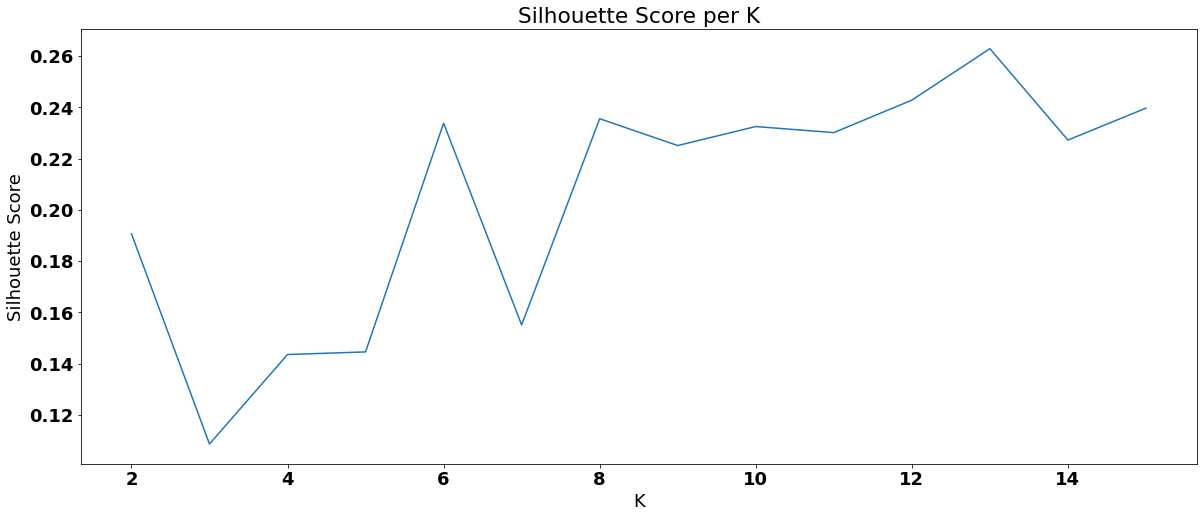

In [ ]:
# Run the silhouette_plot here
silhouette_plot(reduced_data)

In [ ]:
# Implement a K-means clusterer here. 
# There are few hyperparameters that you can tweak.
# Look at scikit-learn documentation.
clusterer = KMeans(n_clusters=8, n_init='auto', max_iter=10000)
cluster_labels = clusterer.fit_predict(reduced_data)

### Evaluate the results of clustering
In most cases you really don't have well defined categories so you can't evaluate your model like you would do in supervised learning. Nonetheless we still have [other methods](https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation) that we can use to reason about our model. One of those methods is [Calinski-Harabasz Index](https://scikit-learn.org/stable/modules/clustering.html#calinski-harabasz-index). Reading the documentation in the previous link use this method on your model. What do you think about the results?

In [ ]:
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz_score(reduced_data, cluster_labels)

68171.53052946531

In [ ]:
calinski_harabasz_score(data, cluster_labels)

56695.6629330603

In [ ]:
del data

Another useful way to reason about your model is by visualizing the clusters. Unfortunately our model is in higher dimensions so we can't visualize the result with normal methods. A common technique used in these situations is the [TSNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html). TSNE in its essence is a dimensionality reduction algorithm but it is used quite often to convert variables to 2D space for visualization. Unfortunately this method takes hours to terminate sometimes. So we will another method namely [UMAP](https://umap-learn.readthedocs.io/en/latest/basic_usage.html) to reduce our data to 2D space and plot your results using libraries like matplotlib.

In [ ]:
from umap import UMAP

In [ ]:
data_2d_umap = UMAP(verbose=True, low_memory=True)
data_2d = data_2d_umap.fit_transform(reduced_data)

UMAP( verbose=True)
Fri Mar  3 08:37:38 2023 Construct fuzzy simplicial set
Fri Mar  3 08:37:38 2023 Finding Nearest Neighbors
Fri Mar  3 08:37:38 2023 Building RP forest with 53 trees
Fri Mar  3 08:38:34 2023 NN descent for 20 iterations
	 1  /  20
	 2  /  20
	Stopping threshold met -- exiting after 2 iterations
Fri Mar  3 08:40:09 2023 Finished Nearest Neighbor Search
Fri Mar  3 08:40:22 2023 Construct embedding


KeyboardInterrupt: ignored

In [ ]:
plt.figure(figsize=(25, 10))
clusters = sns.scatterplot(x=data_2d[:,0], y=data_2d[:,1], hue=cluster_labels.astype(str))
clusters.set_title("Clusters", pad=12, size=25)

## Finished early?
Don't worry we've got you backed up. Here are few things to consider:
- We talked about reducing dimensionality methods. We used PCA but it has its drawbacks the most serious one is that it assumes that the data is linear which is usually not the case. A more powerful method for reducing dimensionality is using autoencoders. Autoencoders are a variant of neural networks that learn how to represent the data in a smaller dimension using machine learning methods. [Read here about autoencoders and try implementing one by yourself](https://blog.keras.io/building-autoencoders-in-keras.html)

- In this notebook we used K-means. K-means has two serious drawbacks:
      1. It assumes spherical clusters.
      2. It is sensitive to noise and outliers.
      

If you want to read further: [Click here](https://developers.google.com/machine-learning/clustering/algorithm/advantages-disadvantages).
Our data had some outliers that made K-means not the preferred method for this problem. A more resilient method to outliers is DBSCAN. [Read here about DBSCAN and try applying it by yourself](https://scikit-learn.org/stable/modules/clustering.html)

## Give us your feedback!
[Please fill in this form and give us your feedback](https://forms.gle/hg9VRLUdnocU4G3Y7)